# Intro to Artificial Neural Networks with Keras

In Artificial Intelligence we get inspiration from nature. And it is in nature that sparked the idea of a artificual neural network. This is a way to mimic biological neurons in code. 

ANNs are at the core of Deep learning, they are versatile, poewrful and scalable, making them ideal to tackle large adn hihgly complex Machine Learning tasks. 

ANNs were first created in a paper in 1943 and it thought to be the next wave of AI. However it died down but now with some much data available and a ton of cheap computing power we are able to take advantage of this framework. 

The way to think of a artificial neuron, is that has 1 or more binary inputs and one binary output. The inputs are on and off switches. 

<img src='images/anns_logical_computation.png'/> </img>

* The first network on the left is the identiy function: if neuron A is activated, then neuron C gets activated as well but if neuron A is off then neuron C is off as well. 

* The second network performs a logical AND neuron C gets activated if either neuron A or neuron B is activated

* The third network performs a logical OR neuron C gets activated if either neuron A or neuron B is activated or both

* Finally, if we suppose that an input connection can inhibit the neurons's activity (which is the case with biological neurons), then the fourth networks computes a slighty more complex logical propsition: Neuron C is activated  only if Nueron A is actiave and neuron B is off. If neuron A isactivate all the time then you get a logical NOT neuron C is active when neuron B is off and vice versa. 

# Perceptron

This is one of the simplest ANN architectures, it is based on a neuron called the Threshold logic unit. The input and outputs are numbers instead of binary on and off switches. Each input connection is associated with a weight. The TLU computes a weighted sum of its input then applies a step funciton to that sum and outputs the results.

<img src="images/tlu.png"/></img>

The most common function is the Heaviside step function. It is a function who values are 0 for negative arguements and 1 for positive arguements. More on teh function on this link: https://en.wikipedia.org/wiki/Heaviside_step_function

A single TLU can be used for simple linear binary classification. It computes a linear combination of the inputs, and if the result exceeds a threshold, it outputs the positive class. 

A perceptron is simply composed of a single layer of TLUs with each TLU connected to all the inputs. When all the neurons in a layer are connected to every neuron in the previous layer, the layer is called *fully connected layer* or a *dense layer*. The Inputs of the Perceptron are fed to a special passthrough neurons called input neurons: they output whatever input they are fed. All the input neurons form the input layer. An extra bias feature is generally added. It is typically represented using a special type of neuron called a bias neuron, which ooutputs 1 all teh time. A perceptron with two inputs and three outputs is represented in Figure10-5. This perceptron cal classify instances simultaneously into three different binary classes which makes it a multioutput classifer. 

<img src="images/figure_10_5.png"></img>

How does a preceptron train?

Well it comes down to the connection between Neurons the stronger the connection the better. A preceptron is fed one training instances at a time and for each instances it makes its predictions. For every output neuron that produced a wrong preddiction, it reinforces the connection weights from the inputs that would have contributed to the correct prediction. 

So a neuron that made the right connection produced the neuron that has the connect connection. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf
assert tf.__version__ >= "2.0"

In [4]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [5]:
iris = load_iris()
X = iris.data[:,(2,3)]
y = (iris.target == 0).astype(np.int)

In [6]:
per_clf = Perceptron()
per_clf.fit(X,y)

Perceptron()

In [7]:
y_pred = per_clf.predict([[2,0.5]])

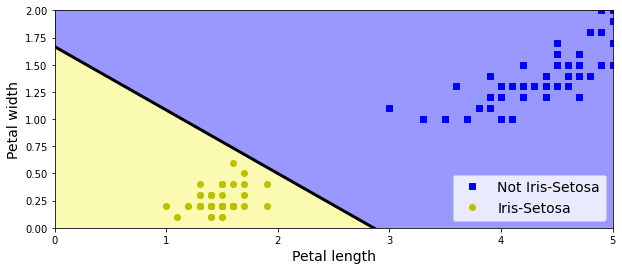

In [8]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

#save_fig("perceptron_iris_plot")
plt.show()

THe decision boundary for each output neuron should be linear, since Perceptrons are incapable of leanring complex patterns. So the dataset should be linearly separable. THis is called the Perceptron convergence theorem. 

The above shows strong similarities with Stochastic Gradient Descent but they do not have a probability output just a hard threshold. 

Preceptrons sometimes have problems solving trival issue but one way to solve this is with a Multilayer Perceptron or MLP. 

## Multilayer Perceptron and Backpropagation

An MLP is composed of one input layer, one or more layers of TLUs called hidden layers and one final layer of TLUs called the output layers. 

Layers except the output layer includes a bias neuron and is fully connected to the next layer. 

<img src="images/mlp_backprop.png"/> </img>

We have two input layers represented by the circles and then one hidden layer with 4 neurosn repesented by the middle layer and then three output neurosn represented by the top layer. The signals at the top flow in 1 direction also called a Feedforward Neural Network or FNN. 

When an ANN contains a deep stack of hidden layers, it is called a deep neural network. Traditionally it was difficult to train a DNN but in 1986 David Rumelhart, Geoffrey Hinton and Ronald Williams published a paperthat introduced back propagation. 

What backpropagation is when Gradient Descent is used to find a efficient technique for computing gradients automatically but passing through the networks in a forward direction and a backward direction. The algorithmn is able to compute teh gradient of the networks error with regard to every singel model parameter. I tcan find out how each connection weight and each gias term shoudl be tweaked in order to reduce the error. Once it has the gradients it just peforma a regular graident descent step and the whole process is repeated until the network converges to the solution. 

*autodiff* automatically computing gradients is what automatic differentiation is.

There are different autodiff techniques each with their own pros and cons. Backpropagation is called reverse-mode autodiff. It is fast and precise and well suited when the function to differentiate has many variables. 

How the backprop algorithmn works:

* It handles one mini batch at a time and it goes through the full training set multiple times. Each pass is called a epoch

* Each mini batch is passed to the network's input layer, which sends it to the first hidden layer. The algorithm then computes the output of all neurons in this layer. The result is passed on to the next layer, its output computed and passed to the next layer, and so on until we get the output of the last layer/output layer. This is a forward pass it is exactly like making predictions, except all intermediate results are preserved since they are needed for the backward pass. 

* Next, the algorithm measures the networks's output error( it uses a loss function that compares the desire doutput and the actual output of the network and returns some measure of the error.)

* Then it computes how much each output connection contributed to the error. This is done analytically by applying the chain rule which makes this step fast and precise. 

* The algorithm then measures how much of these errors contributions came from each connection in the layer below, again using the chain rule, working backward until the algorithm reaches the input layer. As explained earlier, this reverse pass efficiently measures the error gradient across all the connection weights in the network by propagating the error gradient backward through the network. 

* Finally, the algorthm performs a Gradient Descent step to tweak all connection weights in the network, using error gradients it just computed. 

It is important to initialize all hidden layers connections randomly or training will fail. The reason for this is because if you set all weights and bias to zero then all neurons in a given layer will be identical and backpropagation will effect all neurons the same way. It will basically act as if it has 1 neuron per layer even if it was a 100 layer NN. 

Backpropagation uses two activation functions this is because activation functions give it a gradient to work with. 

You need to use activation functions because if you chain linear transformations all you get is linear tranformations. Activations help NN learn complex patterns by adding non-linearity. See this article for more info:https://towardsdatascience.com/everything-you-need-to-know-about-activation-functions-in-deep-learning-models-84ba9f82c253#:~:text=Simply%20put%2C%20an%20activation%20function,fired%20to%20the%20next%20neuron.



In [9]:
#Activation functions

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

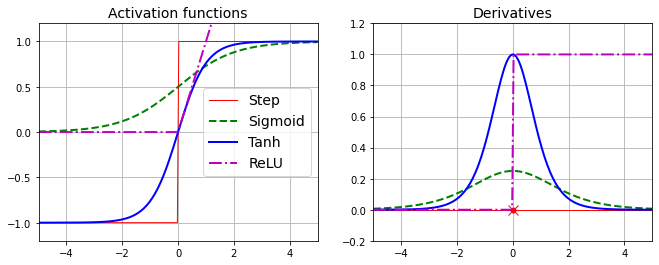

In [10]:

z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

#save_fig("activation_functions_plot")
plt.show()

Above we see different activation functions let discuss two:

1.) TanH or hyperbolic tangent function: This function is S shaped continous and differential but is output value ranges from -1 to 1. Intstead of 0 to 1. The range tends to make each layer's output more or less centered around 0 at the beginning of traiing which often helps speed up convergence. 

2.) Relu or Recitified Linear Unit Function: It is continous but not differential at z =0 and it's derivattive is 0 for z < 0. IN practice, however it works very well and has the advantage of being ast to compute so it has become the default. Most importantly, the fact that it does not have a maximum output value helps reduce some issues during Gradient Descent. 

## Regression MLPs

If you want to predict a single value then you just need a single output neruon. Its output is the predicted value. For multivariate regression to predict multiple values at once you need 1 output neuron per dimension. 

You do not want to use any activation function when doing MLP for regression. You want to guarantee that the output will be positive. Then you can use the Relu function. in the output layer. There are other approaches like using the softplus activation function which is a smooth variant of Relu. You can guarantee that the predictions will fall within a given range of values, then you can use logistic function or hyperbolic tangent then scale the lables to the appropriate range 0 to 1 for logistic function and -1 to 1 for the hyperbolic tangent. 

Genrally the loss function is the mean squared error but if you have lot of outliers in the training set you may prefer to use the mean absolute error instead. 

*Typical Regerssion MLP Architecture*

Hyperparameters ----- Typical Value
#input neurons  ----- One per input feature (28x28 = 784 for MNSIT)

#hidden layers  ----- Depends on the problem but typically 1 to 5

#neurons per hidden layer ----Depends on the problem but typically 10 to 100

#output neurons ------ 1 per prediction dimension

Hidden activation ------ ReLU

Output activation ------ None, RELU/softplus

Loss function ------ MSE or MAE/Huber if(outliers)

## Classification MLPs

MLPs can be used for classification tasks. One doing a classification binary output you need just 1 output neuron because the output will be 0 or 1. You can also estimate the probability of the positive class. 

MLPs can also easily handled multilabel binary classification tasks this just nmeans you need 1 output neuron per each class. 

<table>
  <tr>
    <th>Hyperparameter</th>
    <th>Binary Classification</th>
    <th>Multilabel binary classification</th>
    <th>Multilabel classification</th>
  </tr>
  <tr>
    <td>Input and Hidden Layers</td>
    <td>Same as regression</td>
    <td>Same as regression</td>
    <td>Same as regressions</td>
  </tr>
  <tr>
    <td># output neurons</td>
    <td>1</td>
    <td>1 per label</td>
    <td>1 per class</td>
  </tr>
  <tr>
    <td>Output layer activation</td>
    <td>Logistic</td>
    <td>Logistic</td>
    <td>Softmax</td>
  </tr>
  <tr>
    <td>Loss function</td>
    <td>Cross entropy</td>
    <td>Cross entropy</td>
    <td>Cross entropy</td>
  </tr>
</table>

## Implementing MLPs with Keras

Keras is a high level Deep Learning API that allows you to easily build, train, evaluate and execute all sorts of neural networks. More documentation is on https://keras.io/. It was developed by Francois Chollet as part of a research project and was released as an open source project in March 2015. At the time this book was published the three most popular open source deep learning libraries are

1.) Tensorflow
2.) Microsoft Cognitive Toolkit
3.) Theano

<img src="images/keras_mxnet_tensorflow.png"/></img>

Another popular option is PyTorch which is facebook's solution. 

# Building a image Classifier Using the Sequential API


In [11]:
import tensorflow as tf
from tensorflow import keras

In [12]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [13]:
X_train_full.shape

(60000, 28, 28)

In [14]:
X_train_full.dtype

dtype('uint8')

In [15]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

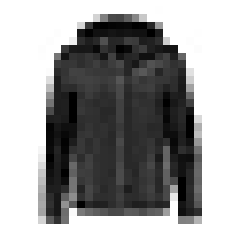

In [16]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [17]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [18]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [19]:
class_names[y_train[0]]

'Coat'

In [20]:
X_valid.shape

(5000, 28, 28)

In [21]:
X_test.shape

(10000, 28, 28)

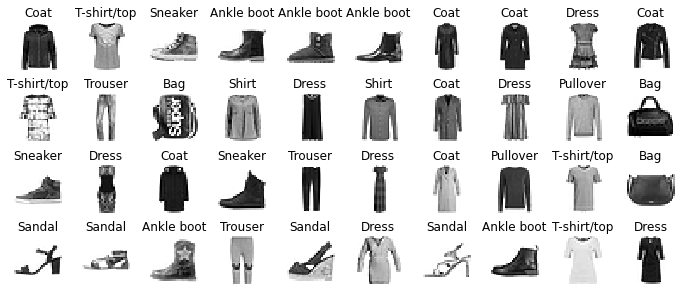

In [22]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
#save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [23]:
#Building a sequential model
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

What the code above is doing is the following:

* The first line creates the sequential model. This is the simplest kind of Keras model for neural networks that are just composed of a single stack of layers connected sequentially. This is called the Sequential API. 

* Next, we build the first layer and add it to the model. It is a Flatten layer whose role is to convert each input image into a 1D array: if it receives input data X, it computes X.reshape(-1,1). This layer does not have any parameters; it is just there to do some simple preprocessing. Since it is the first layer in the mode, you should specify the input_shape, which doesn't include the batch size, only the shape of the instances. Alternatively, you could add a keras.layers.InputLayer as the first layer, as input_shape=[28,28]

* Next we add a Dense hidden layer with 300 neurons. It will use the ReLU activation function. Each Dense layer manages its own weight matrix, containing all the connection weights between the neurons and their inputs. It also manages a vector of bias terms(one per neuron). When it receives some input data, it computes Equation 10-2.

* Then we add a second Dense hidden layer with 100 neurons, also using the ReLU activation function. 

* Finally, we add a Dense output layer with 10 neurons (one per class), using the softmax activation function. 

You can also pass a list of list of layers:



In [24]:
#First I clear the keras model
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [25]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [26]:
model.layers

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [28]:
#You can see the model's layer using the function
model.layers

In [29]:
hidden1 = model.layers[1]
hidden1.name


'dense'

In [30]:
model.get_layer('dense') is hidden1

True

In [31]:
weights, biases = hidden1.get_weights()

In [32]:
weights.shape

(784, 300)

In [33]:
biases.shape

(300,)

After creating a model you need to compile it. This is where you can specify the loss function and the optimizer to use. 

In [34]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metric=["accuracy"])

In [35]:
#Training the model
history = model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 7s 129us/sample - loss: 0.7228 - val_loss: 0.5305
Epoch 2/30
55000/55000 [==============================] - 7s 130us/sample - loss: 0.4838 - val_loss: 0.4494
Epoch 3/30
55000/55000 [==============================] - 10s 175us/sample - loss: 0.4380 - val_loss: 0.4172
Epoch 4/30
55000/55000 [==============================] - 10s 188us/sample - loss: 0.4127 - val_loss: 0.3900
Epoch 5/30
55000/55000 [==============================] - 9s 170us/sample - loss: 0.3930 - val_loss: 0.3979
Epoch 6/30
55000/55000 [==============================] - 10s 179us/sample - loss: 0.3777 - val_loss: 0.3725
Epoch 7/30
55000/55000 [==============================] - 10s 180us/sample - loss: 0.3645 - val_loss: 0.3662
Epoch 8/30
55000/55000 [==============================] - 10s 173us/sample - loss: 0.3524 - val_loss: 0.3616
Epoch 9/30
55000/55000 [==============================] - 10s 177us/sample - loss:

In [36]:
history.params

{'batch_size': 32,
 'epochs': 30,
 'steps': 1719,
 'samples': 55000,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'val_loss']}

In [37]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [38]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

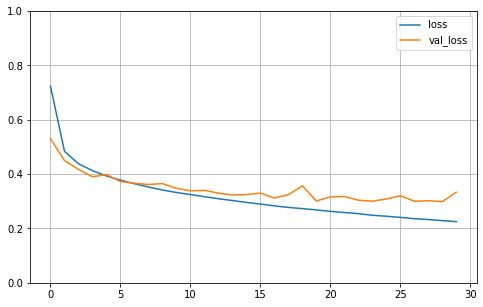

In [39]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
plt.show()

In [40]:
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.36831746773719787

Tips for improving a model if it underperforms:

* First check the learning rate
* Then try another optimizer
* Change activation functions
* Tune hyperparameters
* Improve training dataset

In [41]:
#Predicting new values and using prbabilit to determine likelihood
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

We see above that there is a 98% probabilty that it is image 9

In [42]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [43]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [44]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

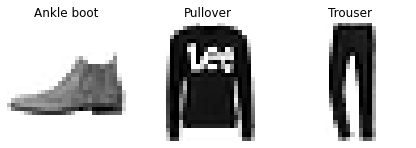

In [45]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
#save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

We predicted correctly each class. Now we will use regression with Sequential API

In [46]:
#California housing data
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [47]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,housing.target,random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,y_train_full,random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [46]:
np.random.seed(42)
tf.random.set_seed(42)

In [47]:
model = keras.models.Sequential([
    keras.layers.Dense(30,activation='relu',input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
    ])

model.compile(loss="mean_squared_error",optimizer="sgd")
history = model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))
mse_test = model.evaluate(X_test,y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 2s 205us/sample - loss: 0.8999 - val_loss: 3.5376
Epoch 2/20
11610/11610 [==============================] - 2s 189us/sample - loss: 0.4441 - val_loss: 1.0743
Epoch 3/20
11610/11610 [==============================] - 2s 188us/sample - loss: 0.4315 - val_loss: 12.1113
Epoch 4/20
11610/11610 [==============================] - 2s 152us/sample - loss: 0.5050 - val_loss: 14.2227
Epoch 5/20
11610/11610 [==============================] - 2s 162us/sample - loss: 0.4716 - val_loss: 65.0946
Epoch 6/20
11610/11610 [==============================] - 2s 167us/sample - loss: 0.6660 - val_loss: 0.3584
Epoch 7/20
11610/11610 [==============================] - 2s 148us/sample - loss: 0.3845 - val_loss: 0.3488
Epoch 8/20
11610/11610 [==============================] - 2s 152us/sample - loss: 0.3780 - val_loss: 0.3479
Epoch 9/20
11610/11610 [==============================] - 2s 144us/sample - loss: 0.

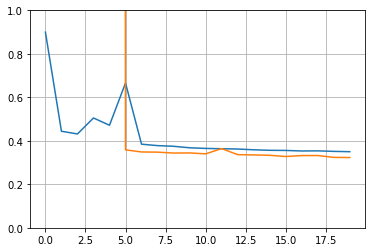

In [48]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Sequential models are a plain stack of layers. One layer on top of another. Each layer is 1 input tensor and 1 output tensor.

But it is possible to build nonsequential neural networks. 

## Building Complex Models using the Functional API

One type of nonsequential NN is a Wide and Deep NN. It connects all or part of the inputs directly to the output layer, this architecture makes it possible for the neural network to learn both deep patterns and simple rules. In contrast, a regualar MLP forces all the data to flow through the full stack of layers, thus simple patterns in the data may end up being distorted. 

<img src="images/wide_and_deep.png"/></img>



In [49]:
#Building a Wide and Deep Neural
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30,activation="relu")(input_)
hidden2 = keras.layers.Dense(30,activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_,hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_],outputs=[output])

Lets breakdown the above code.

* First, we need to create an Input object. This is a specification of the kind of input the model will get, including its shape and dtype. A model may actually have multiple inputs, as we will see shortly.

* Next, we create a Dense layer with 30 neurons, using the ReLU activation function. As soon as it is created, notice that we call it like a normal function, passing it to the input. This is why this is called the Functional API. Note that we are just telling Keras how it should connect the layers together; no actual data is being processed yet. 

* We then create a second hidden layer, and again we use it as a function. Note that we pass it the output of the first hidden layer. 

* Next, we create a Concatenate layer, and once again we imeediately use it like a function, to concatenate the input and the output of the second hidden layer. You may prefer the keras.layers.concatenate() function, which creates a Concatenate layer and immediateley calls it with the given inputs. 

* Then we create the output layer, with a single neuron and no activation function, and we call it like a function, passing it the result of the concatenation.

* Lastly, we create a Keras model, specifiing which inputs and outputs to use. 

In [50]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           930         dense_5[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_6[0][0]                

In [51]:
#Follow the compile steps same as before
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 2s 193us/sample - loss: 1.8716 - val_loss: 2.0992
Epoch 2/20
11610/11610 [==============================] - 2s 163us/sample - loss: 0.6590 - val_loss: 0.8409
Epoch 3/20
11610/11610 [==============================] - 2s 171us/sample - loss: 0.5956 - val_loss: 0.6495
Epoch 4/20
11610/11610 [==============================] - 2s 173us/sample - loss: 0.5629 - val_loss: 0.6644
Epoch 5/20
11610/11610 [==============================] - 2s 177us/sample - loss: 0.5400 - val_loss: 0.6005
Epoch 6/20
11610/11610 [==============================] - 2s 178us/sample - loss: 0.5171 - val_loss: 0.8458
Epoch 7/20
11610/11610 [==============================] - 2s 179us/sample - loss: 0.5058 - val_loss: 0.4805
Epoch 8/20
11610/11610 [==============================] - 2s 175us/sample - loss: 0.4876 - val_loss: 0.5796
Epoch 9/20
11610/11610 [==============================] - 2s 174us/sample - loss: 0.479

Using the above we use one set of features to our model but what if we wanted to pass different subset of features to the model. For example features 0 - 5 and then series 6-9. Lets see what this looks like

<img src="images/multiple_inputs.png"/></img>

So we can do one model normal then one path with and another set of features via another path. 

In [52]:
#Building with a functional API
input_A = keras.layers.Input(shape=[5],name="wide_input")
input_B = keras.layers.Input(shape=[6],name="deep_input")
hidden1 = keras.layers.Dense(30,activation="relu")(input_B)
hidden2 = keras.layers.Dense(30,activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A,hidden2])
output = keras.layers.Dense(1,name="output")(concat)
model = keras.Model(inputs=[input_A,input_B],outputs=[output])

In [53]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 2s 186us/sample - loss: 2.0042 - val_loss: 0.9797
Epoch 2/20
11610/11610 [==============================] - 2s 193us/sample - loss: 0.7905 - val_loss: 0.6946
Epoch 3/20
11610/11610 [==============================] - 2s 164us/sample - loss: 0.6507 - val_loss: 0.6242
Epoch 4/20
11610/11610 [==============================] - 2s 208us/sample - loss: 0.5985 - val_loss: 0.5876
Epoch 5/20
11610/11610 [==============================] - 2s 194us/sample - loss: 0.5668 - val_loss: 0.5435
Epoch 6/20
11610/11610 [==============================] - 2s 196us/sample - loss: 0.5418 - val_loss: 0.5263
Epoch 7/20
11610/11610 [==============================] - 2s 197us/sample - loss: 0.5223 - val_loss: 0.4988
Epoch 8/20
11610/11610 [==============================] - 2s 163us/sample - loss: 0.5064 - val_loss: 0.4843
Epoch 9/20
11610/11610 [==============================] - 2s 169us/sample - loss: 0.494

Above we trained the model on two features but using the deep neural network for just the input B data

In [54]:
mse_test

0.430153228377187

Situations where you want multiple outputs:

* You mahve have a task that is both regression and classification. You may want to locate and classify the main object in a a picture. For example maybe the regression task is about finding the coordindates of the objeccts center and a classification task of what the picture is.

* Similarly, you may have multiple independent tasks based on the same data. Sure, you could train one neural network per task, but in many cases you will get better results on all tasks by training a single neural network with one output per task. This is because the neural network can learn features in the data that are useful across tasks. For example, you could perform multitask classification on pictures of faces, using one output to classify the person's facial expression and anothe routput to identy whether they are wearing glasses or not. 

* Another use cse is as regularization technique( a training constraint whose objective is to reduce overfitting and thus improve the model's ability to generalize). For example, you may want to add some auxiliary outputs in a neural network architecture to ensure that the underlying part of the network learns something useful on its own, without relying on the rest of the network. 

<img src="images/auxiliary_output.png"/></img>

In order to get extra outputs you just connect them to the appropriate layers and add them to your model's list of outputs. 

In [55]:
#Building a auxiluary output
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [56]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

In [57]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 3s 226us/sample - loss: 2.2526 - main_output_loss: 1.9334 - aux_output_loss: 5.1178 - val_loss: 2.8020 - val_main_output_loss: 2.2146 - val_aux_output_loss: 8.0788
Epoch 2/20
11610/11610 [==============================] - 2s 183us/sample - loss: 1.0720 - main_output_loss: 0.8472 - aux_output_loss: 3.0940 - val_loss: 1.5773 - val_main_output_loss: 0.9075 - val_aux_output_loss: 7.6002
Epoch 3/20
11610/11610 [==============================] - 2s 183us/sample - loss: 0.8507 - main_output_loss: 0.7027 - aux_output_loss: 2.1812 - val_loss: 1.2927 - val_main_output_loss: 0.6751 - val_aux_output_loss: 6.8464
Epoch 4/20
11610/11610 [==============================] - 2s 198us/sample - loss: 0.7529 - main_output_loss: 0.6390 - aux_output_loss: 1.7777 - val_loss: 1.1224 - val_main_output_loss: 0.5970 - val_aux_output_loss: 5.8464
Epoch 5/20
11610/11610 [==============================] - 2s 21

In [58]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

## Subclassing API to Build Dynamic Models

Sequential API and Functional API are declarative by declaring which layers you want to use and how they should be connected. Though there are benefits like debugging easier, saving a model or cloning. But it is just static . 

Some models involve loops, varying shapes, conditional branching, and other dynamic behaviours. For such cases, or simply if you prefer a more imperative programming style, the Sublcassing API is for you. 

The Model class can create layers you need in the constructor and use them to perform the computations you want in the call() method. 

In [59]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self,units=30,activation="relu",**kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units,activation=activation)
        self.hidden2 = keras.layers.Dense(units,activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    
    def call(self,inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A,hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
model = WideAndDeepModel()

In [60]:
model.compile(loss="mse",loss_weight=[0.9,0.1],optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit((X_train_A,X_train_B),(y_train,y_train),epochs=10,
                    validation_data=((X_valid_A,X_valid_B),(y_valid,y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 3s 227us/sample - loss: 3.6633 - output_1_loss: 1.6738 - output_2_loss: 1.9883 - val_loss: 3.9037 - val_output_1_loss: 1.7139 - val_output_2_loss: 2.1885
Epoch 2/10
11610/11610 [==============================] - 2s 197us/sample - loss: 1.7190 - output_1_loss: 0.6802 - output_2_loss: 1.0386 - val_loss: 1.9494 - val_output_1_loss: 0.7761 - val_output_2_loss: 1.1729
Epoch 3/10
11610/11610 [==============================] - 2s 196us/sample - loss: 1.4121 - output_1_loss: 0.5651 - output_2_loss: 0.8468 - val_loss: 1.4419 - val_output_1_loss: 0.5733 - val_output_2_loss: 0.8683
Epoch 4/10
11610/11610 [==============================] - 3s 243us/sample - loss: 1.2624 - output_1_loss: 0.5196 - output_2_loss: 0.7425 - val_loss: 1.2556 - val_output_1_loss: 0.5154 - val_output_2_loss: 0.7399
Epoch 5/10
11610/11610 [==============================] - 2s 190us/sample - loss: 1.1769 - output_1_los

In [61]:
model = WideAndDeepModel(30, activation="relu")

## Saving and Restoring a model

When using a Sequential API or Functional APi you can save a model using HDF5 format. THis aves the model's architecture and the values of all the model parameters for every layer and it saves the optimizer. 

In [62]:
model = keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=[8]),
    keras.layers.Dense(30,activation="relu"),
    keras.layers.Dense(1)
])

In [63]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 2s 215us/sample - loss: 1.7597 - val_loss: 1.1342
Epoch 2/10
11610/11610 [==============================] - 3s 221us/sample - loss: 0.7260 - val_loss: 0.6511
Epoch 3/10
11610/11610 [==============================] - 3s 220us/sample - loss: 0.6480 - val_loss: 0.6128
Epoch 4/10
11610/11610 [==============================] - 2s 202us/sample - loss: 0.6042 - val_loss: 0.5657
Epoch 5/10
11610/11610 [==============================] - 2s 190us/sample - loss: 0.5694 - val_loss: 0.5258
Epoch 6/10
11610/11610 [==============================] - 2s 173us/sample - loss: 0.5399 - val_loss: 0.4986
Epoch 7/10
11610/11610 [==============================] - 2s 152us/sample - loss: 0.5153 - val_loss: 0.4756
Epoch 8/10
11610/11610 [==============================] - 2s 157us/sample - loss: 0.4954 - val_loss: 0.4607
Epoch 9/10
11610/11610 [==============================] - 2s 155us/sample - loss: 0.478

In [79]:
mse_test

0.42275073056997253

In [80]:
model.save("my_keras_model.h5")
model.predict(X_new)

array([[0.9454769],
       [1.6594186],
       [3.4735806]], dtype=float32)

In [81]:
model.save_weights("my_keras_weights.ckpt")
model.load_weights("my_keras_weights.ckpt")

## Using Callbacks

Callbacks are useful when you want to stop or set a checkpoint in your model. This is a situation when you want to exit during a training period say after you achieve a 95% accuarcy you want to exit.

Another useful case for a call back is when you want to save at regular checkpoints.  For Keras the fit() method accepts callbacks using the callbacks arguement. The ModelCHeckpoint callbakc saves the checkpoints of your model at regular intervals during training. 

When training if you want to use the validation data you can select a option called save_best_only=True and this way you do no need to worry abou ttraining for too long and overfitting the training set: you just exit or save the best results. 

In [64]:
#Clearing the previous tensorflow section
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [65]:
model = keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=[8]),
    keras.layers.Dense(30,activation="relu"),
    keras.layers.Dense(1)
])

In [66]:
model.compile(loss="mse",optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",save_best_only=True)
history = model.fit(X_train,y_train,epochs=10,
                   validation_data=(X_valid,y_valid),
                   callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5")
mse_test = model.evaluate(X_test,y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 1s 121us/sample - loss: 1.8631 - val_loss: 3.2403
Epoch 2/10
11610/11610 [==============================] - 1s 103us/sample - loss: 0.6723 - val_loss: 0.6939
Epoch 3/10
11610/11610 [==============================] - 1s 114us/sample - loss: 0.5927 - val_loss: 0.5531
Epoch 4/10
11610/11610 [==============================] - 1s 120us/sample - loss: 0.5550 - val_loss: 0.5519
Epoch 5/10
11610/11610 [==============================] - 1s 123us/sample - loss: 0.5278 - val_loss: 0.5715
Epoch 6/10
11610/11610 [==============================] - 1s 103us/sample - loss: 0.5032 - val_loss: 0.5591
Epoch 7/10
11610/11610 [==============================] - 1s 115us/sample - loss: 0.4863 - val_loss: 0.4593
Epoch 8/10
11610/11610 [==============================] - 1s 102us/sample - loss: 0.4701 - val_loss: 0.4651
Epoch 9/10
11610/11610 [==============================] - 2s 142us/sample - loss: 0.458

In [67]:
#Introducing early stopping
model.compile(loss="mse",optimizer=keras.optimizers.SGD(lr=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

history = model.fit(X_train,y_train,epochs=100,
                   validation_data=(X_valid,y_valid),
                   callbacks=[checkpoint_cb,early_stopping_cb])
mse_test = model.evaluate(X_test,y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 2s 165us/sample - loss: 0.4388 - val_loss: 0.4122
Epoch 2/100
11610/11610 [==============================] - 1s 120us/sample - loss: 0.4319 - val_loss: 0.4046
Epoch 3/100
11610/11610 [==============================] - 1s 104us/sample - loss: 0.4256 - val_loss: 0.4065
Epoch 4/100
11610/11610 [==============================] - 1s 109us/sample - loss: 0.4202 - val_loss: 0.3998
Epoch 5/100
11610/11610 [==============================] - 1s 106us/sample - loss: 0.4157 - val_loss: 0.3970
Epoch 6/100
11610/11610 [==============================] - 1s 114us/sample - loss: 0.4112 - val_loss: 0.3964
Epoch 7/100
11610/11610 [==============================] - 1s 118us/sample - loss: 0.4072 - val_loss: 0.3807
Epoch 8/100
11610/11610 [==============================] - 1s 121us/sample - loss: 0.4040 - val_loss: 0.3778
Epoch 9/100
11610/11610 [==============================] - 2s 133us/sample - lo

Above we say with EarlyStopping and the patience command that it will stop once the validation data loss does not improve. This is the number of epochs with no improvement after which training will be stopped. 

## Tensorboard for Visualization

Tensorboard is a vsiualization tool that you can use to view the learning curves during training, compare learning curves between multiple runs, visualize the computation graph, analyze training statistics, view images generated by your model, visualize complex multidimensional data projected down to 3D and automatically clustered for you. It comes installed with tensorflow. 

THe way to use it is with is when binary log files called event files. Each binary data record is called a summary. Tensorboard will monitor log directory and it will automatically pick up changes and update the visualizations. THis way you can visualize live data with a short delay. 

First you start by defining the root log directory tha twill be used for TensorBoard logs, plus a small function that will generate a subdirectory path based on the current date and time so that it's different at every run. You can include extra information in the log directory name, such as hyperparameter values that you are testing, to make it easier to know what you are looking at in TensorBoard. 

In [68]:
#Create the root directory
import os # if you haven't before
root_logdir = os.path.join(os.curdir,"my_logs")

In [69]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir,run_id)

run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2020_12_24-18_23_56'

In [71]:
#clear the back
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [73]:
model = keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=[8]),
    keras.layers.Dense(30,activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse",optimizer=keras.optimizers.SGD(lr=1e-3))

In [74]:
#Building tensorboard
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train,y_train,epochs=30,
                   validation_data=(X_valid,y_valid),
                   callbacks=[checkpoint_cb,tensorboard_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 1s 124us/sample - loss: 1.8373 - val_loss: 2.8236
Epoch 2/30
11610/11610 [==============================] - 1s 94us/sample - loss: 0.7880 - val_loss: 0.7494
Epoch 3/30
11610/11610 [==============================] - 1s 99us/sample - loss: 0.6797 - val_loss: 0.6271
Epoch 4/30
11610/11610 [==============================] - 2s 130us/sample - loss: 0.6262 - val_loss: 0.5998
Epoch 5/30
11610/11610 [==============================] - 1s 115us/sample - loss: 0.5843 - val_loss: 0.5389
Epoch 6/30
11610/11610 [==============================] - 1s 125us/sample - loss: 0.5489 - val_loss: 0.5217
Epoch 7/30
11610/11610 [==============================] - 1s 118us/sample - loss: 0.5206 - val_loss: 0.4847
Epoch 8/30
11610/11610 [==============================] - 1s 122us/sample - loss: 0.4984 - val_loss: 0.4595
Epoch 9/30
11610/11610 [==============================] - 2s 152us/sample - loss: 0.4797 

In [76]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


## Fine-Tuning Neural Network Hyperparameters

The flexibility of neural networks is also a drawbacks, there are many hyperparameters to tweak. Even for simple networks.

Now we will look at a few approaches but one approach is to use GridSearch or RandomizedSearchCV

In [78]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [79]:
def build_model(n_hidden=1,n_neurons=30,learning_rate=3e-3,input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons,activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse",optimizer=optimizer)
    return model

In [81]:
#Now we will build a KerasRegressor 
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [83]:
keras_reg.fit(X_train,y_train,epochs=100,
             validation_data=(X_valid,y_valid),
             callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 99us/sample - loss: 1.2023 - val_loss: 1.5558
Epoch 2/100
11610/11610 [==============================] - 1s 84us/sample - loss: 0.6041 - val_loss: 0.5326
Epoch 3/100
11610/11610 [==============================] - 1s 124us/sample - loss: 0.5243 - val_loss: 0.5401
Epoch 4/100
11610/11610 [==============================] - 1s 92us/sample - loss: 0.4799 - val_loss: 0.4765
Epoch 5/100
11610/11610 [==============================] - 1s 81us/sample - loss: 0.4541 - val_loss: 0.4160
Epoch 6/100
11610/11610 [==============================] - 1s 99us/sample - loss: 0.4363 - val_loss: 0.4056
Epoch 7/100
11610/11610 [==============================] - 1s 100us/sample - loss: 0.4259 - val_loss: 0.3946
Epoch 8/100
11610/11610 [==============================] - 1s 114us/sample - loss: 0.4179 - val_loss: 0.3919
Epoch 9/100
11610/11610 [==============================] - 1s 114us/sample - loss: 0

In [84]:
mse_test = keras_reg.score(X_test,y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [85]:
y_pred = keras_reg.predict(X_new)

In [86]:
y_pred

array([0.67528915, 1.692992  , 3.7885962 ], dtype=float32)

In [87]:
from sklearn.metrics import r2_score 

In [90]:
r2_score(y_test[0:3],y_pred)

0.7786171567302269

In [93]:
#Using randomnize search to train the model. 
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

params_distribs = {
    "n_hidden":[0,1,2,3],
    "n_neurons":np.arange(1,100),
    "learning_rate":reciprocal(3e-4,3e-2)
}
rnd_search_cv = RandomizedSearchCV(keras_reg,params_distribs,n_iter=10,cv=3,verbose=2)
rnd_search_cv.fit(X_train,y_train,epochs=100,
                 validation_data=(X_valid,y_valid),
                 callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] learning_rate=0.00037192261022352417, n_hidden=3, n_neurons=80 ..
Train on 7740 samples, validate on 3870 samples
Epoch 1/100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


7740/7740 [==============================] - 1s 166us/sample - loss: 2.9700 - val_loss: 8.8392
Epoch 2/100
7740/7740 [==============================] - 1s 112us/sample - loss: 1.2539 - val_loss: 4.0986
Epoch 3/100
7740/7740 [==============================] - 1s 136us/sample - loss: 0.8847 - val_loss: 2.0690
Epoch 4/100
7740/7740 [==============================] - 1s 152us/sample - loss: 0.7538 - val_loss: 1.2800
Epoch 5/100
7740/7740 [==============================] - 1s 137us/sample - loss: 0.6984 - val_loss: 0.9047
Epoch 6/100
7740/7740 [==============================] - 1s 122us/sample - loss: 0.6680 - val_loss: 0.7415
Epoch 7/100
7740/7740 [==============================] - 1s 156us/sample - loss: 0.6466 - val_loss: 0.6715
Epoch 8/100
7740/7740 [==============================] - 1s 130us/sample - loss: 0.6293 - val_loss: 0.6269
Epoch 9/100
7740/7740 [==============================] - 1s 147us/sample - loss: 0.6143 - val_loss: 0.6017
Epoch 10/100
7740/7740 [=========================

[CV]  learning_rate=0.00037192261022352417, n_hidden=3, n_neurons=80, total= 1.5min
[CV] learning_rate=0.00037192261022352417, n_hidden=3, n_neurons=80 ..


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.5min remaining:    0.0s


Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 193us/sample - loss: 3.0843 - val_loss: 4.5121
Epoch 2/100
7740/7740 [==============================] - 2s 244us/sample - loss: 1.3267 - val_loss: 5.5989
Epoch 3/100
7740/7740 [==============================] - 2s 238us/sample - loss: 1.0025 - val_loss: 4.6133
Epoch 4/100
7740/7740 [==============================] - 2s 214us/sample - loss: 0.8637 - val_loss: 3.4827
Epoch 5/100
7740/7740 [==============================] - 2s 203us/sample - loss: 0.7773 - val_loss: 2.5523
Epoch 6/100
7740/7740 [==============================] - 2s 203us/sample - loss: 0.7205 - val_loss: 1.9554
Epoch 7/100
7740/7740 [==============================] - 1s 189us/sample - loss: 0.6816 - val_loss: 1.5736
Epoch 8/100
7740/7740 [==============================] - 2s 235us/sample - loss: 0.6527 - val_loss: 1.2637
Epoch 9/100
7740/7740 [==============================] - 2s 194us/sample - loss: 0.6297 - val_lo

[CV]  learning_rate=0.00037192261022352417, n_hidden=3, n_neurons=80, total=  42.4s
[CV] learning_rate=0.00037192261022352417, n_hidden=3, n_neurons=80 ..
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 230us/sample - loss: 3.1968 - val_loss: 5.3499
Epoch 2/100
7740/7740 [==============================] - 2s 272us/sample - loss: 1.5882 - val_loss: 3.1670
Epoch 3/100
7740/7740 [==============================] - 2s 225us/sample - loss: 1.0522 - val_loss: 1.9739
Epoch 4/100
7740/7740 [==============================] - 2s 210us/sample - loss: 0.8274 - val_loss: 1.2910
Epoch 5/100
7740/7740 [==============================] - 1s 156us/sample - loss: 0.7166 - val_loss: 0.9201
Epoch 6/100
7740/7740 [==============================] - 1s 189us/sample - loss: 0.6579 - val_loss: 0.7336
Epoch 7/100
7740/7740 [==============================] - 2s 216us/sample - loss: 0.6232 - val_loss: 0.6449
Epoch 8/100
7740/7740 [=========================

[CV]  learning_rate=0.00037192261022352417, n_hidden=3, n_neurons=80, total= 1.2min
[CV] learning_rate=0.0008763224455697141, n_hidden=1, n_neurons=47 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 216us/sample - loss: 3.5214 - val_loss: 6.2606
Epoch 2/100
7740/7740 [==============================] - 1s 160us/sample - loss: 1.3323 - val_loss: 1.0769
Epoch 3/100
7740/7740 [==============================] - 1s 162us/sample - loss: 0.8881 - val_loss: 0.7800
Epoch 4/100
7740/7740 [==============================] - 1s 176us/sample - loss: 0.7759 - val_loss: 0.7177
Epoch 5/100
7740/7740 [==============================] - 1s 146us/sample - loss: 0.7339 - val_loss: 0.6736
Epoch 6/100
7740/7740 [==============================] - 1s 171us/sample - loss: 0.7060 - val_loss: 0.6544
Epoch 7/100
7740/7740 [==============================] - 1s 173us/sample - loss: 0.6843 - val_loss: 0.6299
Epoch 8/100
7740/7740 [=========================

7740/7740 [==============================] - 1s 186us/sample - loss: 0.3885 - val_loss: 0.3715
Epoch 76/100
7740/7740 [==============================] - 1s 165us/sample - loss: 0.3880 - val_loss: 0.3733
Epoch 77/100
7740/7740 [==============================] - 1s 165us/sample - loss: 0.3872 - val_loss: 0.4033
Epoch 78/100
7740/7740 [==============================] - 1s 170us/sample - loss: 0.3869 - val_loss: 0.3873
Epoch 79/100
7740/7740 [==============================] - 1s 182us/sample - loss: 0.3863 - val_loss: 0.3942
Epoch 80/100
7740/7740 [==============================] - 1s 177us/sample - loss: 0.3858 - val_loss: 0.3974
Epoch 81/100
7740/7740 [==============================] - 1s 190us/sample - loss: 0.3853 - val_loss: 0.3718
Epoch 82/100
7740/7740 [==============================] - 1s 190us/sample - loss: 0.3846 - val_loss: 0.3798
Epoch 83/100
7740/7740 [==============================] - 1s 157us/sample - loss: 0.3842 - val_loss: 0.3747
Epoch 84/100
7740/7740 [=================

[CV]  learning_rate=0.0008763224455697141, n_hidden=1, n_neurons=47, total= 1.9min
[CV] learning_rate=0.0008763224455697141, n_hidden=1, n_neurons=47 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 233us/sample - loss: 2.8902 - val_loss: 1.6103
Epoch 2/100
7740/7740 [==============================] - 1s 173us/sample - loss: 0.9995 - val_loss: 1.3138
Epoch 3/100
7740/7740 [==============================] - 1s 189us/sample - loss: 0.7686 - val_loss: 0.7768
Epoch 4/100
7740/7740 [==============================] - 1s 168us/sample - loss: 0.7022 - val_loss: 0.6553
Epoch 5/100
7740/7740 [==============================] - 1s 167us/sample - loss: 0.6653 - val_loss: 0.7861
Epoch 6/100
7740/7740 [==============================] - 1s 159us/sample - loss: 0.6374 - val_loss: 1.0265
Epoch 7/100
7740/7740 [==============================] - 1s 163us/sample - loss: 0.6138 - val_loss: 1.3159
Epoch 8/100
7740/7740 [==========================

[CV]  learning_rate=0.0008763224455697141, n_hidden=1, n_neurons=47, total=  19.3s
[CV] learning_rate=0.0008763224455697141, n_hidden=1, n_neurons=47 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 180us/sample - loss: 2.5863 - val_loss: 1.5825
Epoch 2/100
7740/7740 [==============================] - 1s 161us/sample - loss: 0.9636 - val_loss: 0.7984
Epoch 3/100
7740/7740 [==============================] - 1s 188us/sample - loss: 0.7512 - val_loss: 0.6985
Epoch 4/100
7740/7740 [==============================] - 2s 204us/sample - loss: 0.6982 - val_loss: 0.6541
Epoch 5/100
7740/7740 [==============================] - 1s 143us/sample - loss: 0.6692 - val_loss: 0.6237
Epoch 6/100
7740/7740 [==============================] - 1s 160us/sample - loss: 0.6466 - val_loss: 0.6060
Epoch 7/100
7740/7740 [==============================] - 1s 161us/sample - loss: 0.6276 - val_loss: 0.5815
Epoch 8/100
7740/7740 [==========================

7740/7740 [==============================] - 1s 178us/sample - loss: 0.3922 - val_loss: 0.3713
Epoch 76/100
7740/7740 [==============================] - 2s 213us/sample - loss: 0.3915 - val_loss: 0.3677
Epoch 77/100
7740/7740 [==============================] - 1s 175us/sample - loss: 0.3906 - val_loss: 0.3693
Epoch 78/100
7740/7740 [==============================] - 1s 177us/sample - loss: 0.3902 - val_loss: 0.3721
Epoch 79/100
7740/7740 [==============================] - 1s 170us/sample - loss: 0.3895 - val_loss: 0.3692
Epoch 80/100
7740/7740 [==============================] - 1s 170us/sample - loss: 0.3888 - val_loss: 0.3663
Epoch 81/100
7740/7740 [==============================] - 1s 162us/sample - loss: 0.3881 - val_loss: 0.3684
Epoch 82/100
7740/7740 [==============================] - 1s 163us/sample - loss: 0.3875 - val_loss: 0.3725
Epoch 83/100
7740/7740 [==============================] - 2s 199us/sample - loss: 0.3868 - val_loss: 0.3835
Epoch 84/100
7740/7740 [=================

[CV]  learning_rate=0.0008763224455697141, n_hidden=1, n_neurons=47, total= 2.1min
[CV] learning_rate=0.0051747964719537, n_hidden=3, n_neurons=55 ......
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 255us/sample - loss: 0.9467 - val_loss: 1.1032
Epoch 2/100
7740/7740 [==============================] - 1s 187us/sample - loss: 0.4820 - val_loss: 0.4550
Epoch 3/100
7740/7740 [==============================] - 2s 199us/sample - loss: 0.4221 - val_loss: 0.4122
Epoch 4/100
7740/7740 [==============================] - 2s 239us/sample - loss: 0.3948 - val_loss: 0.4157
Epoch 5/100
7740/7740 [==============================] - 2s 228us/sample - loss: 0.3796 - val_loss: 0.3726
Epoch 6/100
7740/7740 [==============================] - 2s 230us/sample - loss: 0.3757 - val_loss: 0.3608
Epoch 7/100
7740/7740 [==============================] - 2s 222us/sample - loss: 0.3632 - val_loss: 0.3671
Epoch 8/100
7740/7740 [==========================

[CV]  learning_rate=0.0051747964719537, n_hidden=3, n_neurons=55, total= 1.4min
[CV] learning_rate=0.0051747964719537, n_hidden=3, n_neurons=55 ......
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 302us/sample - loss: 1.1958 - val_loss: 0.5822
Epoch 2/100
7740/7740 [==============================] - 2s 205us/sample - loss: 0.5474 - val_loss: 1.1650
Epoch 3/100
7740/7740 [==============================] - 2s 204us/sample - loss: 0.4630 - val_loss: 1.1998
Epoch 4/100
7740/7740 [==============================] - 2s 209us/sample - loss: 0.4232 - val_loss: 0.8073
Epoch 5/100
7740/7740 [==============================] - 2s 201us/sample - loss: 0.4005 - val_loss: 0.5561
Epoch 6/100
7740/7740 [==============================] - 2s 275us/sample - loss: 0.3851 - val_loss: 0.3618
Epoch 7/100
7740/7740 [==============================] - 2s 216us/sample - loss: 0.3760 - val_loss: 0.3727
Epoch 8/100
7740/7740 [=============================

[CV]  learning_rate=0.0051747964719537, n_hidden=3, n_neurons=55, total=  27.5s
[CV] learning_rate=0.0051747964719537, n_hidden=3, n_neurons=55 ......
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 278us/sample - loss: 1.1151 - val_loss: 1.5702
Epoch 2/100
7740/7740 [==============================] - 2s 238us/sample - loss: 0.5504 - val_loss: 0.8958
Epoch 3/100
7740/7740 [==============================] - 2s 261us/sample - loss: 0.4693 - val_loss: 0.4578
Epoch 4/100
7740/7740 [==============================] - 2s 225us/sample - loss: 0.4264 - val_loss: 0.3949
Epoch 5/100
7740/7740 [==============================] - 2s 226us/sample - loss: 0.4015 - val_loss: 0.4412
Epoch 6/100
7740/7740 [==============================] - 2s 213us/sample - loss: 0.3897 - val_loss: 0.4028
Epoch 7/100
7740/7740 [==============================] - 1s 192us/sample - loss: 0.3781 - val_loss: 0.3614
Epoch 8/100
7740/7740 [=============================

[CV]  learning_rate=0.0051747964719537, n_hidden=3, n_neurons=55, total=  38.6s
[CV] learning_rate=0.027770456976200626, n_hidden=0, n_neurons=3 .....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 78us/sample - loss: 0.8412 - val_loss: 27.5598
Epoch 2/100
7740/7740 [==============================] - 0s 37us/sample - loss: 1.2348 - val_loss: 2296.7736
Epoch 3/100
7740/7740 [==============================] - 0s 43us/sample - loss: 5.6847 - val_loss: 1612.4559
Epoch 4/100
7740/7740 [==============================] - 0s 35us/sample - loss: 127.4136 - val_loss: 2979.9400
Epoch 5/100
7740/7740 [==============================] - 0s 36us/sample - loss: 1.9181 - val_loss: 540.8047
Epoch 6/100
7740/7740 [==============================] - 0s 41us/sample - loss: 7.5084 - val_loss: 1426.8933
Epoch 7/100
7740/7740 [==============================] - 0s 39us/sample - loss: 3.8339 - val_loss: 1841.9637
Epoch 8/100
7740/7740 [================

[CV]  learning_rate=0.027770456976200626, n_hidden=0, n_neurons=3, total=   3.7s
[CV] learning_rate=0.027770456976200626, n_hidden=0, n_neurons=3 .....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 73us/sample - loss: 0.9077 - val_loss: 19.2718
Epoch 2/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.5244 - val_loss: 26.9129
Epoch 3/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.5241 - val_loss: 25.9947
Epoch 4/100
7740/7740 [==============================] - 0s 40us/sample - loss: 0.5233 - val_loss: 31.5248
Epoch 5/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.5180 - val_loss: 14.6662
Epoch 6/100
7740/7740 [==============================] - 0s 35us/sample - loss: 0.5240 - val_loss: 6.7231
Epoch 7/100
7740/7740 [==============================] - 0s 34us/sample - loss: 0.5127 - val_loss: 26.4195
Epoch 8/100
7740/7740 [=============================

[CV]  learning_rate=0.027770456976200626, n_hidden=0, n_neurons=3, total=   7.4s
[CV] learning_rate=0.027770456976200626, n_hidden=0, n_neurons=3 .....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 95us/sample - loss: 6.2803 - val_loss: 5.3803
Epoch 2/100
7740/7740 [==============================] - 0s 45us/sample - loss: 1.0546 - val_loss: 55.9060
Epoch 3/100
7740/7740 [==============================] - 0s 36us/sample - loss: 1.1393 - val_loss: 874.9133
Epoch 4/100
7740/7740 [==============================] - 0s 36us/sample - loss: 1.8447 - val_loss: 1520.9921
Epoch 5/100
7740/7740 [==============================] - 0s 40us/sample - loss: 24.4080 - val_loss: 128.6540
Epoch 6/100
7740/7740 [==============================] - 0s 36us/sample - loss: 10.4159 - val_loss: 2.7308
Epoch 7/100
7740/7740 [==============================] - 0s 36us/sample - loss: 1.7504 - val_loss: 213.9689
Epoch 8/100
7740/7740 [=======================

[CV]  learning_rate=0.027770456976200626, n_hidden=0, n_neurons=3, total=   6.4s
[CV] learning_rate=0.01573990360087585, n_hidden=2, n_neurons=21 .....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 175us/sample - loss: 0.9784 - val_loss: 0.5574
Epoch 2/100
7740/7740 [==============================] - 1s 191us/sample - loss: 0.4750 - val_loss: 24.1216
Epoch 3/100
7740/7740 [==============================] - 1s 181us/sample - loss: 0.6375 - val_loss: 30.0821
Epoch 4/100
7740/7740 [==============================] - 1s 176us/sample - loss: 0.6537 - val_loss: 4.6271
Epoch 5/100
7740/7740 [==============================] - 1s 165us/sample - loss: 0.4206 - val_loss: 0.6494
Epoch 6/100
7740/7740 [==============================] - 1s 181us/sample - loss: 0.3834 - val_loss: 0.3468
Epoch 7/100
7740/7740 [==============================] - 1s 175us/sample - loss: 0.3560 - val_loss: 0.3297
Epoch 8/100
7740/7740 [==========================

7740/7740 [==============================] - 1s 178us/sample - loss: 0.2716 - val_loss: 0.3084
3870/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[CV]  learning_rate=0.01573990360087585, n_hidden=2, n_neurons=21, total= 1.8min
[CV] learning_rate=0.01573990360087585, n_hidden=2, n_neurons=21 .....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 199us/sample - loss: 0.8477 - val_loss: 4.5400
Epoch 2/100
7740/7740 [==============================] - 2s 200us/sample - loss: 0.4828 - val_loss: 1.9928
Epoch 3/100
7740/7740 [==============================] - 1s 177us/sample - loss: 0.4247 - val_loss: 0.3952
Epoch 4/100
7740/7740 [==============================] - 1s 182us/sample - loss: 0.4015 - val_loss: 0.4983
Epoch 5/100
7740/7740 [==============================] - 1s 178us/sample - loss: 0.3911 - val_loss: 0.6069
Epoch 6/100
7740/7740 [==============================] - 1s 183us/sample - loss: 0.3819 - val_loss: 0.4829
Epoch 7/100
7740/7740 [==============================] - 1s 178us/sample - loss: 0.3757 - val_loss: 0.7257
Epoch 8/100
7740/7740 [============================

[CV]  learning_rate=0.01573990360087585, n_hidden=2, n_neurons=21, total=  19.7s
[CV] learning_rate=0.01573990360087585, n_hidden=2, n_neurons=21 .....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 213us/sample - loss: 0.8293 - val_loss: 0.9986
Epoch 2/100
7740/7740 [==============================] - 2s 195us/sample - loss: 0.4482 - val_loss: 1.0249
Epoch 3/100
7740/7740 [==============================] - 1s 175us/sample - loss: 0.4273 - val_loss: 10.8393
Epoch 4/100
7740/7740 [==============================] - 1s 193us/sample - loss: 0.4259 - val_loss: 6.0375
Epoch 5/100
7740/7740 [==============================] - 1s 175us/sample - loss: 0.4691 - val_loss: 1.0579
Epoch 6/100
7740/7740 [==============================] - 1s 167us/sample - loss: 0.4097 - val_loss: 0.3566
Epoch 7/100
7740/7740 [==============================] - 1s 180us/sample - loss: 0.3817 - val_loss: 0.3613
Epoch 8/100
7740/7740 [===========================

7740/7740 [==============================] - 1s 182us/sample - loss: 0.2819 - val_loss: 0.3029
Epoch 76/100
7740/7740 [==============================] - 1s 178us/sample - loss: 0.2842 - val_loss: 0.3095
Epoch 77/100
7740/7740 [==============================] - 1s 173us/sample - loss: 0.2814 - val_loss: 0.2787
Epoch 78/100
7740/7740 [==============================] - 1s 171us/sample - loss: 0.2809 - val_loss: 0.2965
Epoch 79/100
7740/7740 [==============================] - 1s 185us/sample - loss: 0.2814 - val_loss: 0.2809
Epoch 80/100
7740/7740 [==============================] - 1s 166us/sample - loss: 0.2785 - val_loss: 0.2908
Epoch 81/100
7740/7740 [==============================] - 1s 180us/sample - loss: 0.2775 - val_loss: 0.2924
Epoch 82/100
7740/7740 [==============================] - 1s 170us/sample - loss: 0.2786 - val_loss: 0.2914
Epoch 83/100
7740/7740 [==============================] - 1s 168us/sample - loss: 0.2782 - val_loss: 0.2928
Epoch 84/100
7740/7740 [=================

[CV]  learning_rate=0.01573990360087585, n_hidden=2, n_neurons=21, total= 2.0min
[CV] learning_rate=0.002388469823418883, n_hidden=1, n_neurons=4 .....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 207us/sample - loss: 2.2915 - val_loss: 1.0009
Epoch 2/100
7740/7740 [==============================] - 1s 153us/sample - loss: 0.8221 - val_loss: 0.6677
Epoch 3/100
7740/7740 [==============================] - 1s 172us/sample - loss: 0.6788 - val_loss: 0.6035
Epoch 4/100
7740/7740 [==============================] - 1s 174us/sample - loss: 0.6305 - val_loss: 0.5637
Epoch 5/100
7740/7740 [==============================] - 1s 158us/sample - loss: 0.5951 - val_loss: 0.5337
Epoch 6/100
7740/7740 [==============================] - 1s 161us/sample - loss: 0.5664 - val_loss: 0.5087
Epoch 7/100
7740/7740 [==============================] - 1s 167us/sample - loss: 0.5417 - val_loss: 0.4872
Epoch 8/100
7740/7740 [============================

7740/7740 [==============================] - 1s 146us/sample - loss: 0.3947 - val_loss: 0.3642
Epoch 76/100
7740/7740 [==============================] - 1s 179us/sample - loss: 0.3944 - val_loss: 0.3639
Epoch 77/100
7740/7740 [==============================] - 1s 178us/sample - loss: 0.3941 - val_loss: 0.3638
Epoch 78/100
7740/7740 [==============================] - 1s 176us/sample - loss: 0.3937 - val_loss: 0.3635
Epoch 79/100
7740/7740 [==============================] - 1s 174us/sample - loss: 0.3933 - val_loss: 0.3642
Epoch 80/100
7740/7740 [==============================] - 1s 170us/sample - loss: 0.3933 - val_loss: 0.3637
Epoch 81/100
7740/7740 [==============================] - 1s 167us/sample - loss: 0.3930 - val_loss: 0.3631
Epoch 82/100
7740/7740 [==============================] - 1s 181us/sample - loss: 0.3925 - val_loss: 0.3639
Epoch 83/100
7740/7740 [==============================] - 1s 164us/sample - loss: 0.3925 - val_loss: 0.3639
Epoch 84/100
7740/7740 [=================

[CV]  learning_rate=0.002388469823418883, n_hidden=1, n_neurons=4, total= 2.2min
[CV] learning_rate=0.002388469823418883, n_hidden=1, n_neurons=4 .....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 186us/sample - loss: 2.7667 - val_loss: 6.1445
Epoch 2/100
7740/7740 [==============================] - 1s 181us/sample - loss: 1.2205 - val_loss: 2.2342
Epoch 3/100
7740/7740 [==============================] - 1s 167us/sample - loss: 0.9044 - val_loss: 0.8452
Epoch 4/100
7740/7740 [==============================] - 1s 179us/sample - loss: 0.7754 - val_loss: 0.7969
Epoch 5/100
7740/7740 [==============================] - 1s 161us/sample - loss: 0.7068 - val_loss: 1.2004
Epoch 6/100
7740/7740 [==============================] - 1s 159us/sample - loss: 0.6583 - val_loss: 1.7168
Epoch 7/100
7740/7740 [==============================] - 1s 153us/sample - loss: 0.6199 - val_loss: 2.2556
Epoch 8/100
7740/7740 [============================

[CV]  learning_rate=0.002388469823418883, n_hidden=1, n_neurons=4, total=  18.8s
[CV] learning_rate=0.002388469823418883, n_hidden=1, n_neurons=4 .....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 178us/sample - loss: 2.9246 - val_loss: 4.8370
Epoch 2/100
7740/7740 [==============================] - 1s 183us/sample - loss: 0.9983 - val_loss: 2.9055
Epoch 3/100
7740/7740 [==============================] - 1s 182us/sample - loss: 0.8157 - val_loss: 2.8820
Epoch 4/100
7740/7740 [==============================] - 1s 169us/sample - loss: 0.7332 - val_loss: 0.8039
Epoch 5/100
7740/7740 [==============================] - 1s 175us/sample - loss: 0.6956 - val_loss: 0.6463
Epoch 6/100
7740/7740 [==============================] - 1s 161us/sample - loss: 0.6648 - val_loss: 1.1575
Epoch 7/100
7740/7740 [==============================] - 1s 166us/sample - loss: 0.6619 - val_loss: 0.7508
Epoch 8/100
7740/7740 [============================

[CV]  learning_rate=0.002388469823418883, n_hidden=1, n_neurons=4, total=  37.0s
[CV] learning_rate=0.02298924804076755, n_hidden=1, n_neurons=9 ......
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 231us/sample - loss: 0.8823 - val_loss: 1.6542
Epoch 2/100
7740/7740 [==============================] - 1s 191us/sample - loss: 0.4756 - val_loss: 0.4164
Epoch 3/100
7740/7740 [==============================] - 1s 172us/sample - loss: 0.4462 - val_loss: 0.3941
Epoch 4/100
7740/7740 [==============================] - 1s 169us/sample - loss: 0.4278 - val_loss: 0.4013
Epoch 5/100
7740/7740 [==============================] - 1s 154us/sample - loss: 0.4263 - val_loss: 0.3891
Epoch 6/100
7740/7740 [==============================] - 1s 163us/sample - loss: 0.4159 - val_loss: 0.3837
Epoch 7/100
7740/7740 [==============================] - 1s 153us/sample - loss: 0.4152 - val_loss: 0.3784
Epoch 8/100
7740/7740 [============================

7740/7740 [==============================] - 1s 177us/sample - loss: 0.3350 - val_loss: 0.3288
Epoch 76/100
7740/7740 [==============================] - 1s 150us/sample - loss: 0.3390 - val_loss: 0.3233
Epoch 77/100
7740/7740 [==============================] - 1s 176us/sample - loss: 0.3372 - val_loss: 0.3279
Epoch 78/100
7740/7740 [==============================] - 1s 156us/sample - loss: 0.3354 - val_loss: 0.3211
Epoch 79/100
7740/7740 [==============================] - 1s 177us/sample - loss: 0.3356 - val_loss: 0.3606
Epoch 80/100
7740/7740 [==============================] - 1s 165us/sample - loss: 0.3348 - val_loss: 0.3315
Epoch 81/100
7740/7740 [==============================] - 1s 149us/sample - loss: 0.3404 - val_loss: 0.3342
Epoch 82/100
7740/7740 [==============================] - 1s 172us/sample - loss: 0.3567 - val_loss: 0.3397
Epoch 83/100
7740/7740 [==============================] - 1s 150us/sample - loss: 0.3362 - val_loss: 0.3287
Epoch 84/100
7740/7740 [=================

[CV]  learning_rate=0.02298924804076755, n_hidden=1, n_neurons=9, total= 2.2min
[CV] learning_rate=0.02298924804076755, n_hidden=1, n_neurons=9 ......
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 200us/sample - loss: 0.8238 - val_loss: 7.1156
Epoch 2/100
7740/7740 [==============================] - 1s 179us/sample - loss: 0.4794 - val_loss: 2.6542
Epoch 3/100
7740/7740 [==============================] - 1s 156us/sample - loss: 0.4310 - val_loss: 0.5432
Epoch 4/100
7740/7740 [==============================] - 1s 170us/sample - loss: 0.4169 - val_loss: 0.3878
Epoch 5/100
7740/7740 [==============================] - 1s 174us/sample - loss: 0.4068 - val_loss: 0.4208
Epoch 6/100
7740/7740 [==============================] - 1s 178us/sample - loss: 0.3999 - val_loss: 0.4063
Epoch 7/100
7740/7740 [==============================] - 1s 181us/sample - loss: 0.3963 - val_loss: 0.5100
Epoch 8/100
7740/7740 [=============================

[CV]  learning_rate=0.02298924804076755, n_hidden=1, n_neurons=9, total=  49.8s
[CV] learning_rate=0.02298924804076755, n_hidden=1, n_neurons=9 ......
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 218us/sample - loss: 1.0772 - val_loss: 0.4817
Epoch 2/100
7740/7740 [==============================] - 1s 145us/sample - loss: 0.4892 - val_loss: 0.4337
Epoch 3/100
7740/7740 [==============================] - 1s 158us/sample - loss: 0.4830 - val_loss: 0.4095
Epoch 4/100
7740/7740 [==============================] - 1s 153us/sample - loss: 0.4327 - val_loss: 0.3887
Epoch 5/100
7740/7740 [==============================] - 1s 186us/sample - loss: 0.4206 - val_loss: 0.3879
Epoch 6/100
7740/7740 [==============================] - 1s 166us/sample - loss: 0.4190 - val_loss: 0.6753
Epoch 7/100
7740/7740 [==============================] - 1s 158us/sample - loss: 0.4147 - val_loss: 0.3835
Epoch 8/100
7740/7740 [=============================

[CV]  learning_rate=0.02298924804076755, n_hidden=1, n_neurons=9, total= 1.5min
[CV] learning_rate=0.00032288937857243905, n_hidden=1, n_neurons=84 ..
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 216us/sample - loss: 4.2180 - val_loss: 3.6320
Epoch 2/100
7740/7740 [==============================] - 1s 169us/sample - loss: 1.9158 - val_loss: 3.1545
Epoch 3/100
7740/7740 [==============================] - 1s 185us/sample - loss: 1.2086 - val_loss: 2.4025
Epoch 4/100
7740/7740 [==============================] - 1s 155us/sample - loss: 0.9467 - val_loss: 1.7590
Epoch 5/100
7740/7740 [==============================] - 1s 178us/sample - loss: 0.8362 - val_loss: 1.2183
Epoch 6/100
7740/7740 [==============================] - 1s 169us/sample - loss: 0.7795 - val_loss: 0.9208
Epoch 7/100
7740/7740 [==============================] - 1s 167us/sample - loss: 0.7462 - val_loss: 0.7663
Epoch 8/100
7740/7740 [=============================

7740/7740 [==============================] - 1s 166us/sample - loss: 0.4326 - val_loss: 0.4007
Epoch 76/100
7740/7740 [==============================] - 1s 189us/sample - loss: 0.4314 - val_loss: 0.3997
Epoch 77/100
7740/7740 [==============================] - 1s 160us/sample - loss: 0.4303 - val_loss: 0.3987
Epoch 78/100
7740/7740 [==============================] - 1s 179us/sample - loss: 0.4292 - val_loss: 0.3977
Epoch 79/100
7740/7740 [==============================] - 1s 188us/sample - loss: 0.4282 - val_loss: 0.3968
Epoch 80/100
7740/7740 [==============================] - 1s 177us/sample - loss: 0.4271 - val_loss: 0.3960
Epoch 81/100
7740/7740 [==============================] - 1s 171us/sample - loss: 0.4261 - val_loss: 0.3951
Epoch 82/100
7740/7740 [==============================] - 1s 148us/sample - loss: 0.4251 - val_loss: 0.3945
Epoch 83/100
7740/7740 [==============================] - 2s 220us/sample - loss: 0.4242 - val_loss: 0.3936
Epoch 84/100
7740/7740 [=================

[CV]  learning_rate=0.00032288937857243905, n_hidden=1, n_neurons=84, total= 2.3min
[CV] learning_rate=0.00032288937857243905, n_hidden=1, n_neurons=84 ..
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 244us/sample - loss: 3.8928 - val_loss: 5.6069
Epoch 2/100
7740/7740 [==============================] - 1s 159us/sample - loss: 2.1595 - val_loss: 7.2793
Epoch 3/100
7740/7740 [==============================] - 1s 173us/sample - loss: 1.4515 - val_loss: 7.7439
Epoch 4/100
7740/7740 [==============================] - 1s 160us/sample - loss: 1.1195 - val_loss: 7.1672
Epoch 5/100
7740/7740 [==============================] - 1s 188us/sample - loss: 0.9437 - val_loss: 6.0615
Epoch 6/100
7740/7740 [==============================] - 1s 179us/sample - loss: 0.8412 - val_loss: 4.8765
Epoch 7/100
7740/7740 [==============================] - 1s 182us/sample - loss: 0.7769 - val_loss: 3.8374
Epoch 8/100
7740/7740 [=========================

[CV]  learning_rate=0.00032288937857243905, n_hidden=1, n_neurons=84, total=  38.0s
[CV] learning_rate=0.00032288937857243905, n_hidden=1, n_neurons=84 ..
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 264us/sample - loss: 3.1318 - val_loss: 9.5036
Epoch 2/100
7740/7740 [==============================] - 1s 163us/sample - loss: 1.6838 - val_loss: 5.8229
Epoch 3/100
7740/7740 [==============================] - 2s 198us/sample - loss: 1.1299 - val_loss: 2.9001
Epoch 4/100
7740/7740 [==============================] - 2s 197us/sample - loss: 0.8997 - val_loss: 1.6203
Epoch 5/100
7740/7740 [==============================] - 1s 179us/sample - loss: 0.8026 - val_loss: 1.0816
Epoch 6/100
7740/7740 [==============================] - 1s 141us/sample - loss: 0.7569 - val_loss: 0.8282
Epoch 7/100
7740/7740 [==============================] - 1s 173us/sample - loss: 0.7317 - val_loss: 0.7338
Epoch 8/100
7740/7740 [=========================

7740/7740 [==============================] - 1s 187us/sample - loss: 0.4333 - val_loss: 0.4343
Epoch 76/100
7740/7740 [==============================] - 1s 178us/sample - loss: 0.4323 - val_loss: 0.4325
Epoch 77/100
7740/7740 [==============================] - 1s 178us/sample - loss: 0.4314 - val_loss: 0.4302
Epoch 78/100
7740/7740 [==============================] - 1s 188us/sample - loss: 0.4304 - val_loss: 0.4302
Epoch 79/100
7740/7740 [==============================] - 1s 160us/sample - loss: 0.4296 - val_loss: 0.4300
Epoch 80/100
7740/7740 [==============================] - 1s 182us/sample - loss: 0.4287 - val_loss: 0.4274
Epoch 81/100
7740/7740 [==============================] - 1s 179us/sample - loss: 0.4278 - val_loss: 0.4283
Epoch 82/100
7740/7740 [==============================] - 1s 161us/sample - loss: 0.4270 - val_loss: 0.4303
Epoch 83/100
7740/7740 [==============================] - 1s 173us/sample - loss: 0.4262 - val_loss: 0.4330
Epoch 84/100
7740/7740 [=================

[CV]  learning_rate=0.00032288937857243905, n_hidden=1, n_neurons=84, total= 2.0min
[CV] learning_rate=0.000910274101743386, n_hidden=3, n_neurons=71 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 279us/sample - loss: 2.1312 - val_loss: 18.3643
Epoch 2/100
7740/7740 [==============================] - 2s 233us/sample - loss: 0.9645 - val_loss: 2.0545
Epoch 3/100
7740/7740 [==============================] - 2s 224us/sample - loss: 0.7052 - val_loss: 0.6519
Epoch 4/100
7740/7740 [==============================] - 2s 258us/sample - loss: 0.6394 - val_loss: 0.5871
Epoch 5/100
7740/7740 [==============================] - 2s 293us/sample - loss: 0.6108 - val_loss: 0.5934
Epoch 6/100
7740/7740 [==============================] - 2s 249us/sample - loss: 0.5852 - val_loss: 0.5394
Epoch 7/100
7740/7740 [==============================] - 2s 237us/sample - loss: 0.5640 - val_loss: 0.5253
Epoch 8/100
7740/7740 [========================

[CV]  learning_rate=0.000910274101743386, n_hidden=3, n_neurons=71, total= 1.5min
[CV] learning_rate=0.000910274101743386, n_hidden=3, n_neurons=71 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 273us/sample - loss: 1.6325 - val_loss: 5.2945
Epoch 2/100
7740/7740 [==============================] - 2s 220us/sample - loss: 0.7870 - val_loss: 1.7859
Epoch 3/100
7740/7740 [==============================] - 2s 224us/sample - loss: 0.6822 - val_loss: 0.8228
Epoch 4/100
7740/7740 [==============================] - 2s 213us/sample - loss: 0.6294 - val_loss: 0.6022
Epoch 5/100
7740/7740 [==============================] - 2s 281us/sample - loss: 0.5903 - val_loss: 0.5685
Epoch 6/100
7740/7740 [==============================] - 2s 240us/sample - loss: 0.5584 - val_loss: 0.5844
Epoch 7/100
7740/7740 [==============================] - 2s 203us/sample - loss: 0.5314 - val_loss: 0.5925
Epoch 8/100
7740/7740 [===========================

[CV]  learning_rate=0.000910274101743386, n_hidden=3, n_neurons=71, total= 1.2min
[CV] learning_rate=0.000910274101743386, n_hidden=3, n_neurons=71 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 286us/sample - loss: 2.2924 - val_loss: 2.8197
Epoch 2/100
7740/7740 [==============================] - 2s 200us/sample - loss: 0.8359 - val_loss: 1.0532
Epoch 3/100
7740/7740 [==============================] - 2s 216us/sample - loss: 0.6870 - val_loss: 0.7293
Epoch 4/100
7740/7740 [==============================] - 2s 237us/sample - loss: 0.6356 - val_loss: 0.6189
Epoch 5/100
7740/7740 [==============================] - 2s 239us/sample - loss: 0.6007 - val_loss: 0.5669
Epoch 6/100
7740/7740 [==============================] - 2s 267us/sample - loss: 0.5722 - val_loss: 0.5333
Epoch 7/100
7740/7740 [==============================] - 2s 213us/sample - loss: 0.5475 - val_loss: 0.5101
Epoch 8/100
7740/7740 [===========================

7740/7740 [==============================] - 1s 192us/sample - loss: 0.3347 - val_loss: 0.3591
Epoch 76/100
7740/7740 [==============================] - 2s 200us/sample - loss: 0.3342 - val_loss: 0.3582
Epoch 77/100
7740/7740 [==============================] - 2s 194us/sample - loss: 0.3336 - val_loss: 0.3557
Epoch 78/100
7740/7740 [==============================] - 2s 259us/sample - loss: 0.3332 - val_loss: 0.3552
Epoch 79/100
7740/7740 [==============================] - 2s 213us/sample - loss: 0.3326 - val_loss: 0.3470
Epoch 80/100
7740/7740 [==============================] - 2s 217us/sample - loss: 0.3319 - val_loss: 0.3428
Epoch 81/100
7740/7740 [==============================] - 2s 211us/sample - loss: 0.3313 - val_loss: 0.3512
Epoch 82/100
7740/7740 [==============================] - 2s 212us/sample - loss: 0.3308 - val_loss: 0.3465
Epoch 83/100
7740/7740 [==============================] - 2s 216us/sample - loss: 0.3298 - val_loss: 0.3658
Epoch 84/100
7740/7740 [=================

[CV]  learning_rate=0.000910274101743386, n_hidden=3, n_neurons=71, total= 3.0min
[CV] learning_rate=0.0049786840924071745, n_hidden=3, n_neurons=47 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 265us/sample - loss: 1.6718 - val_loss: 1.1484
Epoch 2/100
7740/7740 [==============================] - 2s 234us/sample - loss: 0.5426 - val_loss: 1.0989
Epoch 3/100
7740/7740 [==============================] - 2s 238us/sample - loss: 0.4531 - val_loss: 0.4889
Epoch 4/100
7740/7740 [==============================] - 2s 219us/sample - loss: 0.4075 - val_loss: 0.6912
Epoch 5/100
7740/7740 [==============================] - 2s 215us/sample - loss: 0.3883 - val_loss: 1.3332
Epoch 6/100
7740/7740 [==============================] - 2s 231us/sample - loss: 0.3837 - val_loss: 0.3637
Epoch 7/100
7740/7740 [==============================] - 2s 253us/sample - loss: 0.3677 - val_loss: 0.3956
Epoch 8/100
7740/7740 [===========================

[CV]  learning_rate=0.0049786840924071745, n_hidden=3, n_neurons=47, total= 1.5min
[CV] learning_rate=0.0049786840924071745, n_hidden=3, n_neurons=47 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 257us/sample - loss: 1.1022 - val_loss: 0.7269
Epoch 2/100
7740/7740 [==============================] - 2s 254us/sample - loss: 0.5197 - val_loss: 1.3304
Epoch 3/100
7740/7740 [==============================] - 2s 227us/sample - loss: 0.4451 - val_loss: 0.7943
Epoch 4/100
7740/7740 [==============================] - 2s 227us/sample - loss: 0.4127 - val_loss: 0.4538
Epoch 5/100
7740/7740 [==============================] - 2s 204us/sample - loss: 0.3943 - val_loss: 0.3647
Epoch 6/100
7740/7740 [==============================] - 2s 212us/sample - loss: 0.3818 - val_loss: 0.3751
Epoch 7/100
7740/7740 [==============================] - 1s 183us/sample - loss: 0.3734 - val_loss: 0.4273
Epoch 8/100
7740/7740 [==========================

[CV]  learning_rate=0.0049786840924071745, n_hidden=3, n_neurons=47, total=  26.3s
[CV] learning_rate=0.0049786840924071745, n_hidden=3, n_neurons=47 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 282us/sample - loss: 1.1779 - val_loss: 0.4982
Epoch 2/100
7740/7740 [==============================] - 2s 211us/sample - loss: 0.4860 - val_loss: 2.2352
Epoch 3/100
7740/7740 [==============================] - 2s 216us/sample - loss: 0.4415 - val_loss: 3.7017
Epoch 4/100
7740/7740 [==============================] - 2s 202us/sample - loss: 0.4386 - val_loss: 9.0868
Epoch 5/100
7740/7740 [==============================] - 2s 220us/sample - loss: 0.4962 - val_loss: 3.5487
Epoch 6/100
7740/7740 [==============================] - 2s 247us/sample - loss: 0.4355 - val_loss: 0.4333
Epoch 7/100
7740/7740 [==============================] - 2s 213us/sample - loss: 0.3892 - val_loss: 0.3902
Epoch 8/100
7740/7740 [==========================

[CV]  learning_rate=0.0049786840924071745, n_hidden=3, n_neurons=47, total=  42.2s


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 35.6min finished


RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7fb01e194f90>, as the constructor either does not set or modifies parameter learning_rate

# Exercises

1.) The Tensorflow playground is a handy neural network simulator built by the TensorFlow team. In this exercise, you will train several binary classifiers in just a few clicks, and tweaks the model's architecture and its hyperparameters to gain some intuition on how neural networks

* Solution not possible to write

2.) Draw an ANN using the original artificial neurons that computes A XOR B 

* Solution not possible to write

3.) Why is it generally preferable to use a Logisitic Regression classifier rather than  classifical Perceptron? How can you tweak a Perceptron to make it equivalent to a Logistic Regression classifier?

* A classical Perceptron will converge only if the dataset is linearaly separable, and it won't be able to estimate class probabilities. In contrast, a Logistic Regression classifier will converge to a good solution even if the dataset even if the dataset is not linearly separable, and it will output class probabilities. If you change the Perceptrons's activation function to the logistic activation function( or the softmax activation function if there are multiple neurons), and if you train it using Gradient Descent (or some other optimization algorithm minimizing the cost function, typically cross entropy), then it becomes equivalent to a Logistic Regression classifier. 

4.Why was the logistic activation function a key ingredient in training the first MLPs?

* Logistic activation was a key ingredient in training the first MLPs because is derivative is always nonzero, so Gradient Descent can always roll down the slope. When the activation function is a step function, Gradient Descent cannot move, as there is no slope at all. 

5.) Name three popular activation functions. Can you draw them?

* RELU
* TanH
* Sigmoid

6.) Suppose you have a MLP composed of one input layer with 10 passthrough neurons, followed by one hidden layer with 50 artificcial neurons use teh ReLU activation function

   - What is the shape of the input matrix X?
     M x 10 
   - What are the shapes of the hidden layer's weight vector W(h) and its bias vector b(h)?
     Wh is 10 x 50 and teh length of bias is 50
   - What are the shapes of the output layer's weight vector W(o) and its bias vector b(o)?
     W(o) is 50 x 3 and length of bias is 3
   - What is the shape of the network's output matrix Y?
     m x 3 
   - Write the equation that computes the network's output matrix Y as a function of X, W(h), b(h), W(o) and b(o)?
     Y* = ReLU(ReLU(XW(h) + b(h)) W(o) + b(o)) 
   
7.) How many neurons do you need in the output layer if you want to classify email into spain or ham? What activation function should you use in the output layer? If instead you want to tackle MNIST, how many neurons do you need in the output layer, and which activation function should you use? What about for getting your network to predict housing prices as in Chapter 2?

* You need only 1 neuron since you will output True or False. You will want to use a sigmoid function especially if linearly separable and this way you can estimate the probability. 10 neurons for the MNIST datset. And for the housing proces then you get 1 neuron since you will output neurons. 

8.)